## COMP4432 Machine Learning
#### Assignment 2
#### Megan Hoeksema

### Packages

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import pickle

### Assignment 2, Part 1:  Data Exploration
Load the scikit-learn diabetes bunch object into a variable. Print out the description of the dataset. Load the diabetes features into a pandas dataframe with the proper column names. Add the target variable to this same dataframe. Run a command to look at the data types of your dataframe to see if there is any missing data. Perform descriptive statistics
on the numeric columns of your dataframe. Plot histograms of your data to get a feel for each column’s distribution. Split your dataframe into a training and test set with 20% of your data being in the test set. Define a correlation matrix. Look
at values highly correlated with the target. Plot the correlation matrix with a Seaborn heatmap. Use a Seaborn pairplot to look at the scatter plots of the three values with the highest target correlation. Prepare a feature set by dropping the
target from your training dataframe. Copy your training target into a new dataframe.

In [2]:
# Load the scikit-learn diabetes bunch object into a variable.
diabetes = load_diabetes()
type(diabetes)

sklearn.utils._bunch.Bunch

In [3]:
# Print out the description of the dataset.
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
# Load the diabetes features into a pandas dataframe with the proper column names.
diabetesDF = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
diabetesDF.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
# Add the target variable to this same dataframe.
diabetes['target'] = diabetes.target
diabetesDF['target'] = diabetes.target
diabetesDF.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
# Run a command to look at the data types of your dataframe to see if there is any missing data.
diabetesDF.isna().sum().sum()

0

In [7]:
# Perform descriptive statistics on the numeric columns of your dataframe.
diabetesDF.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


<function matplotlib.pyplot.show(close=None, block=None)>

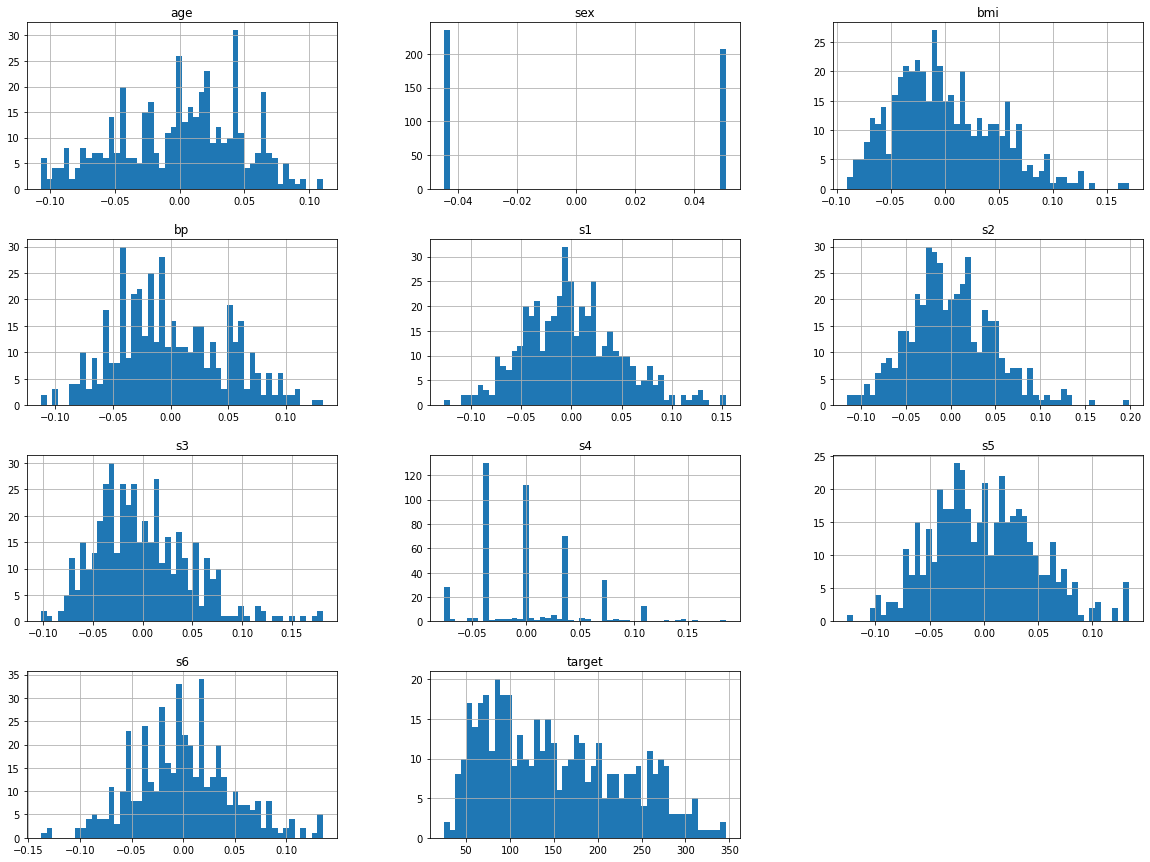

In [8]:
# Plot histograms of your data to get a feel for each column’s distribution.
fig = diabetesDF.hist(bins = 50, figsize = (20,15))
plt.show

In [9]:
# Split your dataframe into a training and test set with 20% of your data being in the test set. 
train_set, test_set = train_test_split(diabetesDF, test_size = 0.2, random_state = 42)

# Check size of each set to verify 80/20 train/test split
print(len(train_set.index))
print(len(test_set.index))

353
89


In [10]:
# Define a correlation matrix. 
corr_matrix = diabetesDF.corr()

In [11]:
# Look at values highly correlated with the target. 
corr_matrix['target'].sort_values(ascending = False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

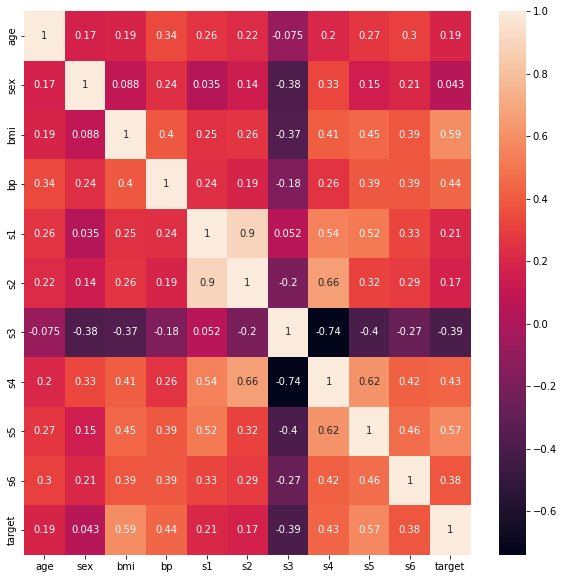

In [12]:
# Plot the correlation matrix with a Seaborn heatmap. 
heatmap = plt.figure(figsize = (10,10))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

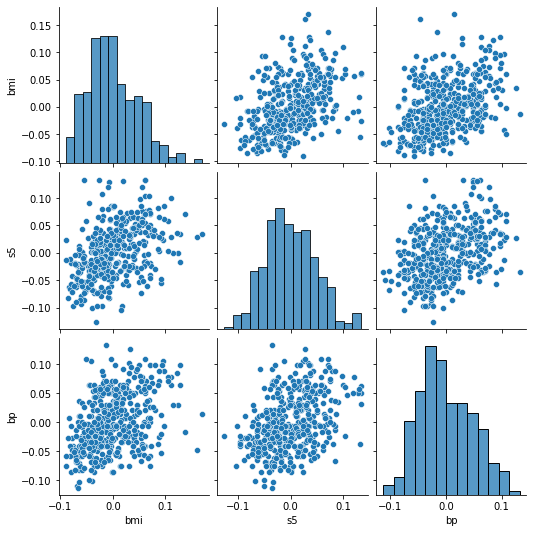

In [13]:
# Use a Seaborn pairplot to look at the scatter plots of the three values with the highest target correlation. 
sns.pairplot(diabetesDF[['bmi', 's5', 'bp']])
plt.show

In [14]:
# Prepare a feature set by dropping the target from your training dataframe. 
featureSet = train_set.drop(columns = ['target'])
featureSet.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499


In [15]:
# Copy your training target into a new dataframe.
trainTarget = train_set[['target']]
trainTarget.head()

,target
17,144.0
66,150.0
137,280.0
245,125.0
31,59.0


### Assignment 2, Part 2: Model Training 
Train a linear regression model using your training set. Print the RMSE of your regression model on your training set. Implement a cross_val_score on a decision tree regressor on your training set. Print out root mean and standard deviation of the cross-validation scores. Do the same for a RandomForestRegressor. Record which model performs better.

In [16]:
# Train a linear regression model using your training set.
model = LinearRegression()
model.fit(featureSet, trainTarget)
diabetesPred = model.predict(featureSet)

In [17]:
# Print the RMSE of your regression model on your training set.
model_mse = mean_squared_error(trainTarget, diabetesPred)
model_rmse = np.sqrt(model_mse)
model_rmse

53.55884336723094

In [26]:
# Implement a cross_val_score on a decision tree regressor on your training set. 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(featureSet, trainTarget)
tree_predictions = tree_reg.predict(featureSet)
tree_mse = mean_squared_error(trainTarget, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
print(f'RMSE: {tree_rmse:.2f}')

scores = cross_val_score(tree_reg, featureSet, trainTarget, scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)
print('Scores:', tree_rmse_scores)

RMSE: 0.00
Scores: [63.35767076 97.39053684 84.80156576 93.90603206 78.03424157 77.92908865
 84.71346663 87.88872835 73.91597546 78.81171051]


In [27]:
# Print out root mean and standard deviation of the cross-validation scores.
print('Mean:', tree_rmse_scores.mean())
print('SD:', tree_rmse_scores.std())

Mean: 82.07490166011185
SD: 9.401103955291955


In [32]:
# Do the same for a RandomForestRegressor.
forest_reg = RandomForestRegressor()
forest_reg.fit(featureSet, trainTarget)
forest_predictions = forest_reg.predict(featureSet)
forest_mse = mean_squared_error(trainTarget, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print(f'RMSE: {forest_rmse:.2f}')

forest_scores = cross_val_score(forest_reg, featureSet, trainTarget, scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
print('Scores:', forest_rmse_scores)

print('Mean:', forest_rmse_scores.mean())
print('SD:', forest_rmse_scores.std())

/tmp/ipykernel_1185/2462907553.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(featureSet, trainTarget)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


RMSE: 21.63


/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/c/users/rai

Scores: [48.92987247 66.82301662 56.58679901 73.99803105 62.70356996 48.16249703
 58.43572733 61.79750776 52.97345853 57.2113238 ]
Mean: 58.76218035633266
SD: 7.560667095997419


/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


The model with the best mean RMSE is the linear model, followed by random forest, then decision tree.

### Assignment 2, Part 3: Model Tuning
Print out the parameters of your random forest model. Do a grid search cross-validation with the following values: n_estimators: 3,10,30 and max_features: 2,4,6,8, as well as the following experiment: bootstrap: False, n_estimators: 3,10 and max_features: 2,3,4. Print out the best parameters and the best performing model based on this grid search. Using the cv_results dictionary, print out the rmse of each feature combination for comparison. Also print out the feature importances of the best performing grid search model. Describe how it compares with the correlation matrix we implemented earlier.

In [33]:
# Print out the parameters of your random forest model.
forest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
# Do a grid search cross-validation with the following values: n_estimators: 3,10,30 and max_features: 2,4,6,8, as well as the 
# following experiment: bootstrap: False, n_estimators: 3,10 and max_features: 2,3,4.

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(featureSet, trainTarget)

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/c/users/rai

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/c/users/rai

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/c/users/rai

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/sklearn/model_selection/_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
# Print out the best parameters and the best performing model based on this grid search.
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30)

In [43]:
grid_search.best_estimator_

{'max_features': 2, 'n_estimators': 30}

In [40]:
# Using the cv_results dictionary, print out the rmse of each feature combination for comparison. 
grid_search.cv_results_

{'mean_fit_time': array([0.00674324, 0.01060333, 0.02969036, 0.00486035, 0.01237731,
        0.03093095, 0.0069335 , 0.01404228, 0.03826327, 0.00592775,
        0.01576333, 0.03870916, 0.00404854, 0.00955162, 0.0048995 ,
        0.01029577, 0.00462132, 0.01196227]),
 'std_fit_time': array([0.00211948, 0.00023966, 0.00253865, 0.00038222, 0.00121983,
        0.00089513, 0.00288086, 0.00256234, 0.00466944, 0.00112702,
        0.00220533, 0.0022132 , 0.00022777, 0.00041727, 0.00080938,
        0.00028778, 0.00028651, 0.00112883]),
 'mean_score_time': array([0.00257497, 0.00276132, 0.00454206, 0.0018733 , 0.00247717,
        0.00439053, 0.00209503, 0.00258074, 0.00482335, 0.00223317,
        0.00315228, 0.00404253, 0.00186582, 0.0025878 , 0.00231481,
        0.00244141, 0.0018774 , 0.00264983]),
 'std_score_time': array([0.00064321, 0.00061824, 0.00078848, 0.00016114, 0.00022788,
        0.00057281, 0.00033209, 0.00042921, 0.00075761, 0.00051077,
        0.00076481, 0.0003824 , 0.0001669 , 

In [49]:
# Also print out the feature importances of the best performing grid search model. 
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.06447054, 0.01336153, 0.21008861, 0.11826885, 0.0668727 ,
       0.08238591, 0.10773304, 0.06858032, 0.17879853, 0.08943997])


The best performing model had max_features of 2.

### Assignment 2, Part 4: Model Evaluation
Document the best-performing model between the single feature model you trained in Assignment 1, and the models
you trained in part 2 and 3 of this assignment. Evaluate the best performing model against your test set. Save your model for future use.

In [51]:
pickle.dump(forest_reg, open('diabetes_random_forest_model.pkl', 'wb'))

In [52]:
!ls *.pkl

diabetes_random_forest_model.pkl
